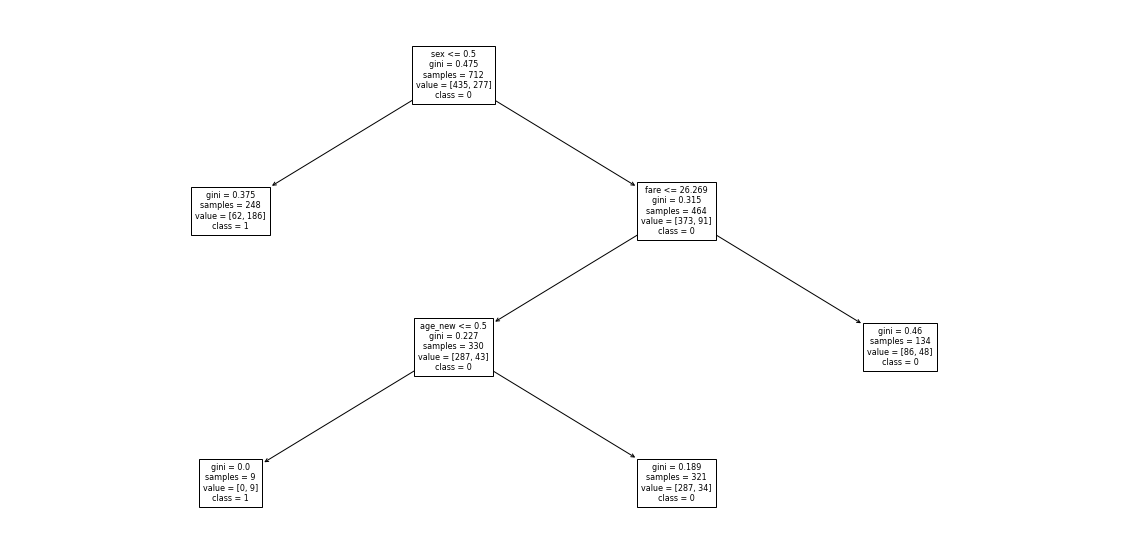

accuracy :  [0.59, 0.75, 0.77, 0.8, 0.83, 0.83, 0.82, 0.79, 0.79, 0.64]
f1_score :  [0.61, 0.72, 0.73, 0.75, 0.77, 0.77, 0.74, 0.61, 0.61, 0.0]
auc score :  [0.65, 0.78, 0.79, 0.8, 0.82, 0.82, 0.8, 0.72, 0.72, 0.5]


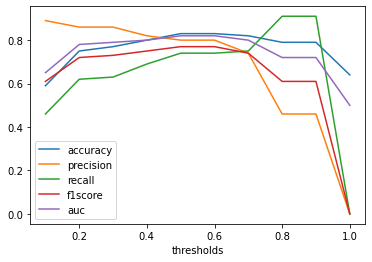

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import Binarizer
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
df1 = df.copy()
df1.deck = df1.deck.astype('O')
# 결측치 처리
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.mean(), inplace=True)
df1.deck.fillna('N', inplace=True)
def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])
label_encoding(df1)
df1.drop(['deck', 'sibsp', 'parch','embarked', 'pclass'], axis=1, inplace=True)
df1.age_new = 0
df1.loc[df1.age >= 50, 'age_new'] = 'old'
df1.loc[(df1.age < 50) & (df1.age >= 10), 'age_new'] = 'young'
df1.loc[df1.age < 10, 'age_new'] = 'baby'
df1_age_new_encoder = LabelEncoder()
df1_age_new_encoder.fit(df1['age_new'])
df1['age_new'] = df1_age_new_encoder.transform(df1['age_new'])
df1.drop('age', axis=1, inplace=True)
X = df1.drop('survived', axis=1)
y = df1.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1score, auc
dtclf = DecisionTreeClassifier(ccp_alpha=0.01)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'],
          feature_names=X_train.columns, fontsize=8)
plt.show()

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_auc = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_test, custom_predict)
        ts_accuracy.append(round(result[0],2))
        ts_precision.append(round(result[1],2))
        ts_recall.append(round(result[2],2))
        ts_f1score.append(round(result[3],2))
        ts_auc.append(round(result[4],2))
        
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    ts_datas['auc'] = ts_auc
    print('accuracy : ',ts_accuracy)
    print('f1_score : ',ts_f1score)
    print('auc score : ',ts_auc)
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
    
dtclf = DecisionTreeClassifier(max_depth=6)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [3]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
#feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

Feature importance:
[0.362 0.565 0.073]


In [5]:
# feature별 importance 매핑
for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sex : 0.388
fare : 0.505
age_new : 0.106


In [54]:
X_train

,sex,fare,age_new
350,1,9.2250,2
509,1,56.4958,2
325,0,135.6333,2
620,1,14.4542,2
356,0,55.0000,2
...,...,...,...
743,1,16.1000,2
672,1,10.5000,1
506,0,26.0000,2
701,1,26.2875,2


<AxesSubplot:>

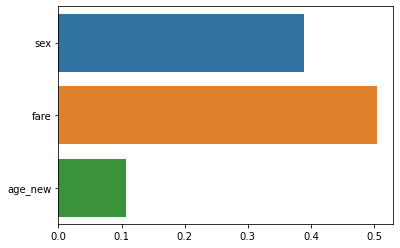

In [6]:
sns.barplot(x=dt_clf.feature_importances_, y=X_train.columns)

In [1]:
# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=X_train.columns,order=df.sort_values(ascending = False).State)



NameError: name 'sns' is not defined

In [17]:
# feature importance를 column 별로 시각화하기
df_dt_clf = pd.DataFrame({'importance':dt_clf.feature_importances_, 'feature':X_train.columns})
df_dt_clf.sort_values(by='importance',axis=0, inplace=True)

<AxesSubplot:xlabel='feature', ylabel='importance'>

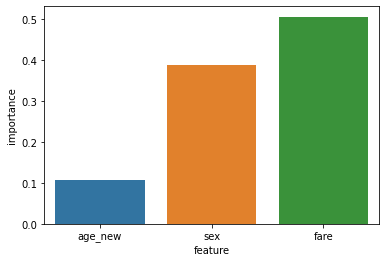

In [18]:
sns.barplot(x=df_dt_clf.feature, y=df_dt_clf.importance)

Feature importanes:
[0.576 0.326 0.098]
sex : 0.576
fare : 0.326
age_new : 0.098


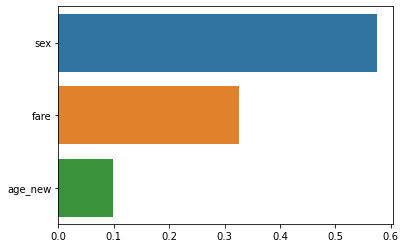

In [20]:
#강사님 코드

# feature importance 추출
print('Feature importanes:\n{0}'.format(np.round(dtclf.feature_importances_, 3)))
# feature별 importance 매핑
f_i1 = {}
f_i2 = {}
for name, value in zip(X.columns, dtclf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    f_i1[name] = value
result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)
for i, j in result1:
    f_i2[i] = j
# feature importance를 column 별로 시각화하기
sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()))
plt.show()

In [22]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow',
               edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('on')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                         np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

sex fare
sex age_new
fare sex
fare age_new
age_new sex
age_new fare


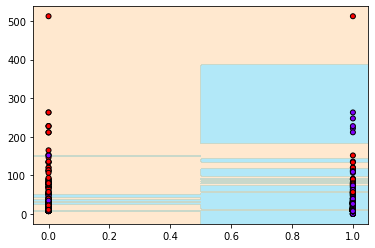

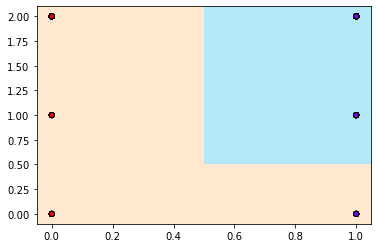

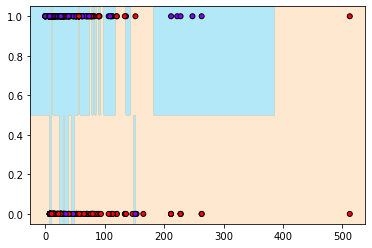

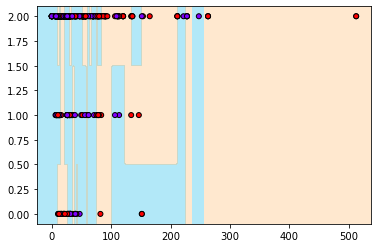

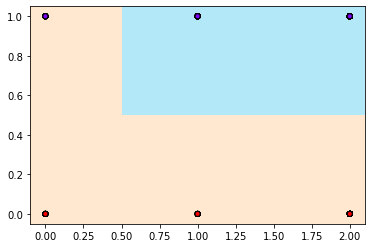

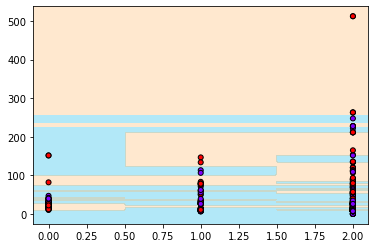

In [42]:
for i in X_train.columns:
    for j in X_train.columns:
        if i != j:
            print(i,j)
            visualize_boundary(dt_clf, X_train[[i,j]], y_train)
        else:
            pass

In [253]:
cancer_train = pd.read_csv('./cancer_train.csv')

In [254]:
cancer_test = pd.read_csv('./cancer_test.csv')

In [255]:
cancer_test.isna().sum()

Id                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
dtype: int64

In [36]:
cancer_train.isna().sum()

Id                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
class                          0
dtype: int64

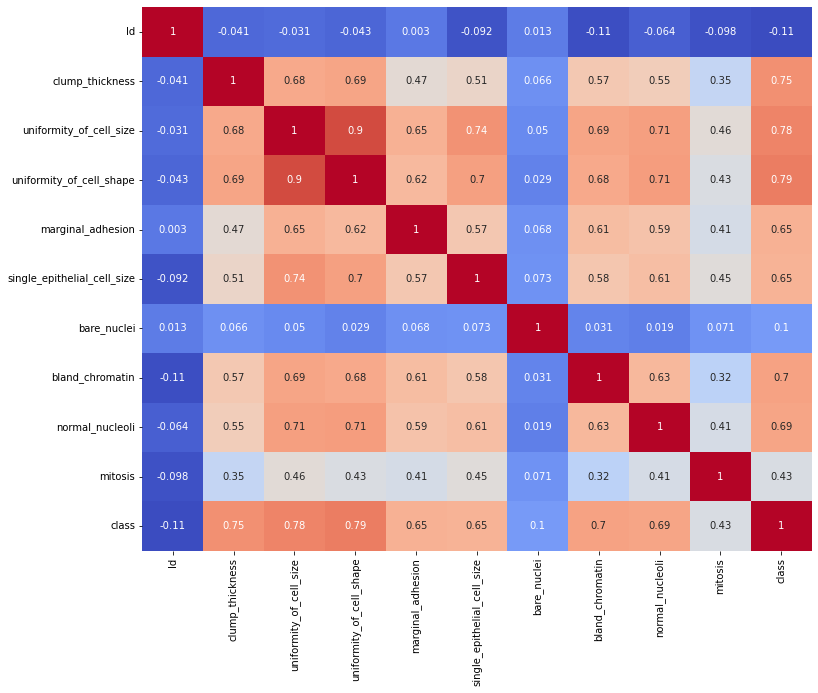

In [43]:
plt.figure(figsize = (12,10))
sns.heatmap(cancer_train.corr(), annot=True, cmap = 'coolwarm', cbar = False)
plt.show()

In [44]:
cancer_train.dtypes # uniformity_of_cell_shape, uniformity_of_cell_size, clump_thickness, bland_chromatin, 
# normal_nucleoli, marginal_adhesion, single_epithelial_cell_size, 

Id                             int64
clump_thickness                int64
uniformity_of_cell_size        int64
uniformity_of_cell_shape       int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitosis                        int64
class                          int64
dtype: object

In [256]:
cancer_train.drop(['Id','bare_nuclei'], axis=1, inplace=True)

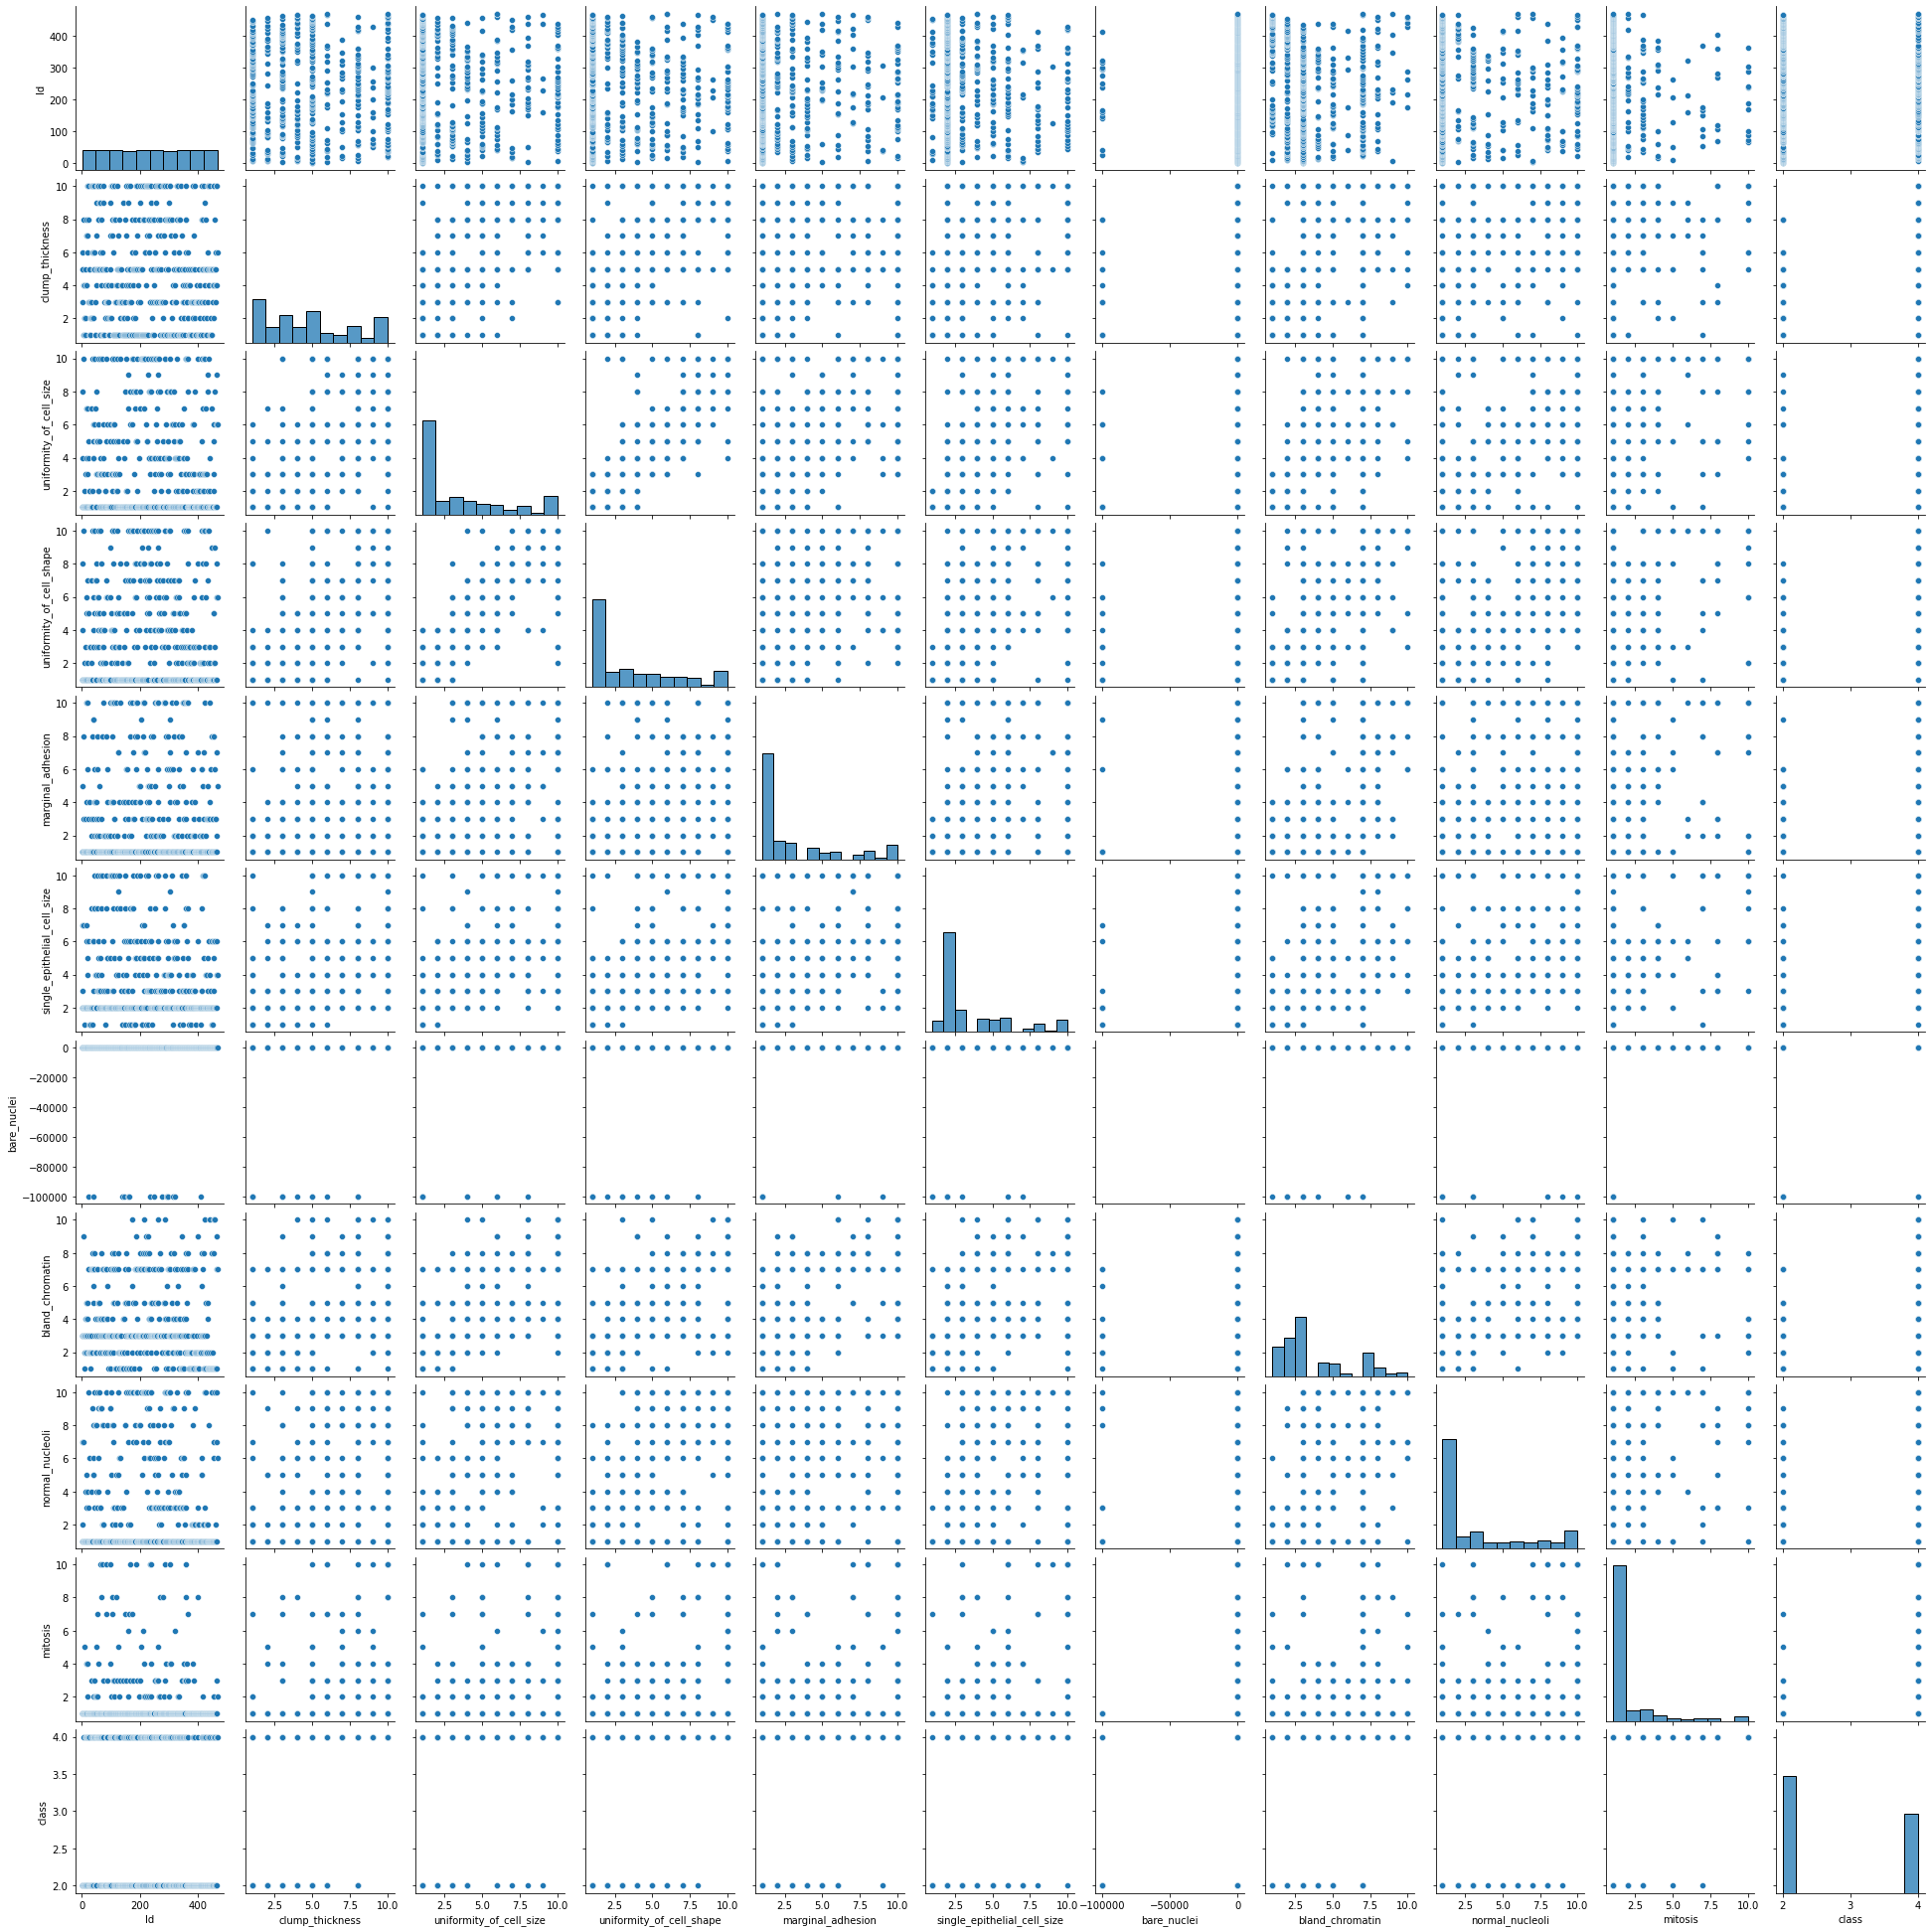

In [45]:
sns.pairplot(cancer_train)

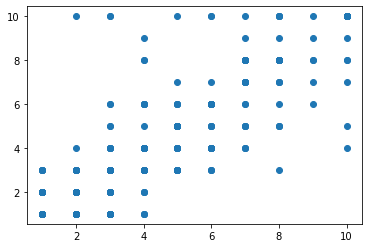

In [257]:
cancer_train['class']

0      2
1      2
2      2
3      2
4      2
      ..
463    2
464    2
465    4
466    4
467    4
Name: class, Length: 468, dtype: int64

In [258]:
cancer_class_encoder = LabelEncoder()
cancer_class_encoder.fit(cancer_train['class'])
cancer_train['class'] = cancer_class_encoder.transform(cancer_train['class'])
print(cancer_class_encoder.classes_)

[2 4]


In [259]:
cancer_dt_clf = DecisionTreeClassifier()
y = cancer_train['class']
X = cancer_train.drop('class', axis=1)

In [260]:
X

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitosis
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...
463,4,1,1,1,2,1,2,1
464,4,1,1,1,2,1,1,1
465,10,9,8,7,6,7,10,3
466,10,6,6,2,4,9,7,1


In [261]:
from sklearn.model_selection import train_test_split
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X, y, test_size=0.1, random_state=12)
print(X_cancer_train.shape)
print(X_cancer_test.shape)
print(y_cancer_train.shape)
print(y_cancer_test.shape)

(421, 8)
(47, 8)
(421,)
(47,)


In [237]:
X_cancer_train

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitosis
343,1,1,1,1,2,1,1,1
321,3,1,1,1,2,3,1,1
44,10,10,10,4,8,8,10,1
14,8,7,5,10,7,5,5,4
87,3,6,6,6,5,6,8,3
...,...,...,...,...,...,...,...,...
241,3,1,1,3,1,3,1,1
253,6,10,10,2,8,7,3,3
390,1,1,1,2,2,2,1,1
155,5,5,5,6,3,3,1,1


In [262]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)

for no, (train_idx, val_idx) in enumerate(skfold.split(X_cancer_train, y_cancer_train)):
    test = y_cancer_train.iloc[val_idx]
    print(test.value_counts())

0    50
1    35
Name: class, dtype: int64
0    50
1    34
Name: class, dtype: int64
0    50
1    34
Name: class, dtype: int64
0    49
1    35
Name: class, dtype: int64
0    49
1    35
Name: class, dtype: int64


In [239]:
cancer_dt_clf.fit(X_cancer_train, y_cancer_train)

DecisionTreeClassifier()

In [240]:
from sklearn.tree import export_graphviz

import graphviz

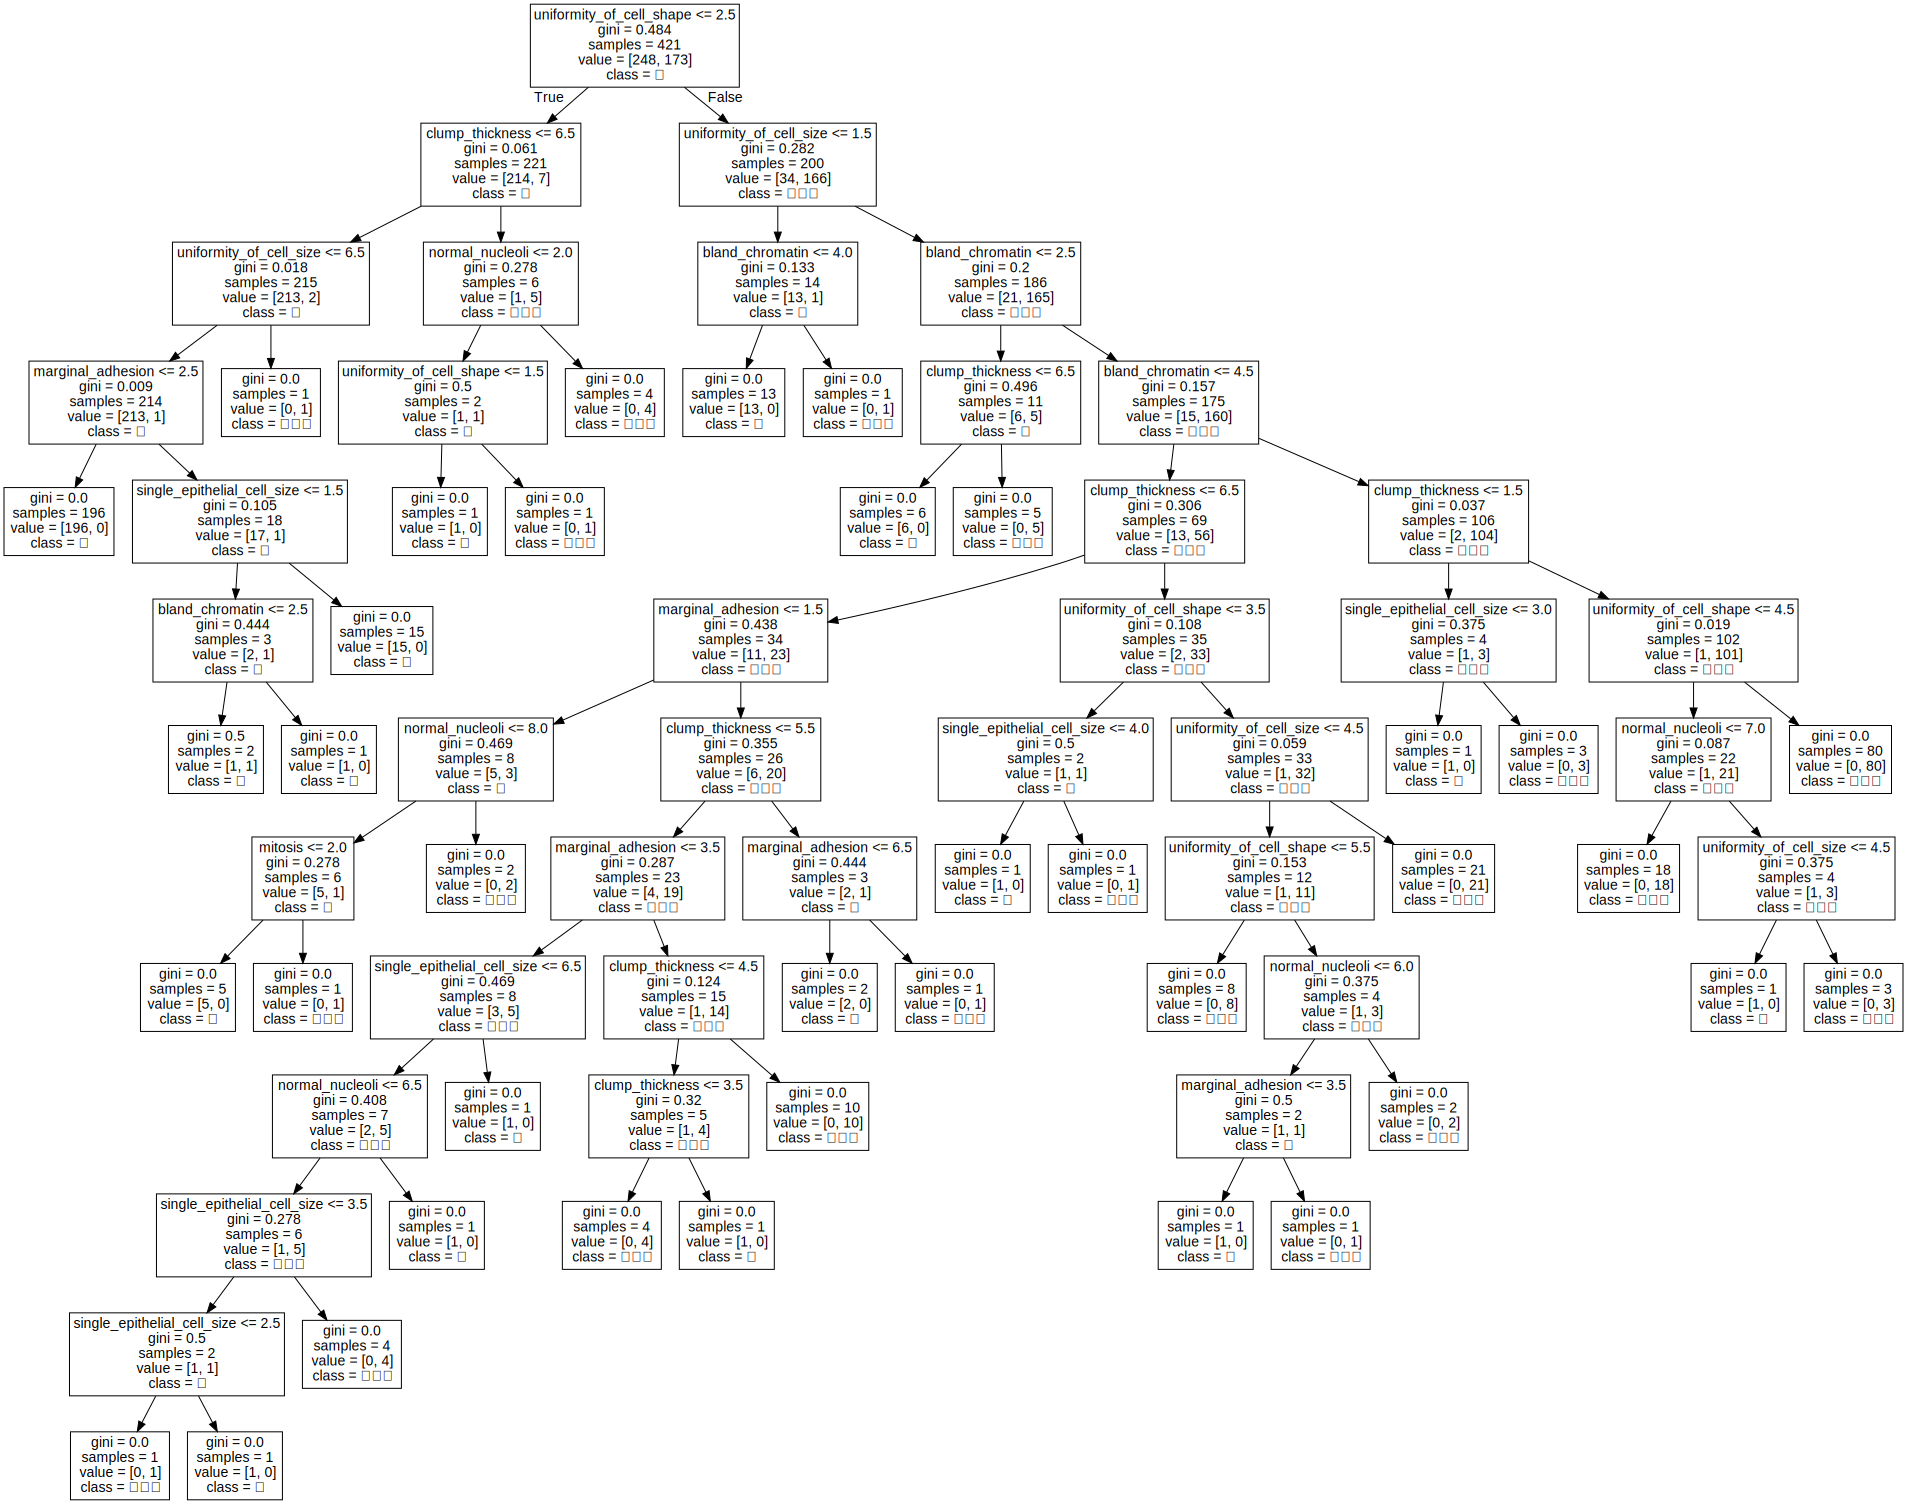

In [241]:
export_graphviz(cancer_dt_clf, out_file='cancer.dot', 
                feature_names=X_cancer_train.columns,
                class_names=['암', '암아님'],
                max_depth=15,
                filled=False,
                leaves_parallel=False,
                rotate=False,
                rounded=False)

with open('./cancer.dot') as f:
    cancer1 = f.read()
graphviz.Source(cancer1)

In [242]:
cancer_dt_clf.predict(X_cancer_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

In [243]:
y_cancer_test

334    1
205    1
409    0
359    1
177    1
277    0
301    0
40     0
6      0
463    0
137    0
392    0
307    0
423    0
393    0
21     1
262    1
101    1
378    0
188    1
258    0
92     0
67     1
319    0
357    1
275    0
1      0
37     0
249    0
266    1
11     0
431    0
294    0
267    1
190    1
167    1
16     0
135    0
168    0
143    0
447    0
229    1
361    1
29     0
150    0
311    0
35     0
Name: class, dtype: int64

In [244]:
cancer_pred = cancer_dt_clf.predict(X_cancer_test)

In [245]:
from sklearn.metrics import accuracy_score   # 정답확인
accuracy_score(y_cancer_test, cancer_pred)

0.9148936170212766

In [247]:
cancer_dt_clf.fit(X,y)

DecisionTreeClassifier()

In [250]:
cancer_pred1 = cancer_dt_clf.predict(cancer_test)
cancer_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [176]:
precision_score(y_cancer_train, cancer_pred)

0.9942196531791907

In [177]:
print('confusion_matrix = \n %s' %confusion_matrix(y_cancer_train, cancer_pred))
print('accuracy_score(정확도) = %f' %accuracy_score(y_cancer_train, cancer_pred))
print('precision_score(정밀도) = %s' %precision_score(y_cancer_train, cancer_pred))
print('recall_score(재현율) = %s' %recall_score(y_cancer_train, cancer_pred))
print('f1_score = %f' %f1_score(y_cancer_train, cancer_pred))
print('roc_auc_score = %f' %roc_auc_score(y_cancer_train, cancer_pred))

confusion_matrix = 
 [[247   1]
 [  1 172]]
accuracy_score(정확도) = 0.995249
precision_score(정밀도) = 0.9942196531791907
recall_score(재현율) = 0.9942196531791907
f1_score = 0.994220
roc_auc_score = 0.995094


In [208]:
cancer_test.drop(['Id','bare_nuclei'], axis=1, inplace=True)
cancer_dt_clf.predict(cancer_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [206]:
cancer_test.head(3)

,Id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,1,4,1,1,1,2,1,1,1,1
1,2,1,1,2,1,2,1,2,1,1
2,3,3,1,1,1,1,1,2,1,1


In [207]:
answer = pd.DataFrame(cancer_dt_clf.predict(X_cancer_test))
answer.head(3)

,0
0,1
1,1
2,0


In [251]:
cancer_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [252]:
cancer_pred1[0]

0

In [ ]:
answer1 = pd.read_csv('./cancer_test.csv')                         
answer1.drop(list(answer1.columns)[1:], axis = 1, inplace=True) 
answer1['class'] = answer['0']
answer1.set_index('Id', inplace=True)
tit.to_csv('tit_test(6).csv')

In [194]:
answer1 = pd.read_csv('./cancer_test.csv')
answer1.drop([0:], axis =1)

SyntaxError: invalid syntax (618289866.py, line 2)

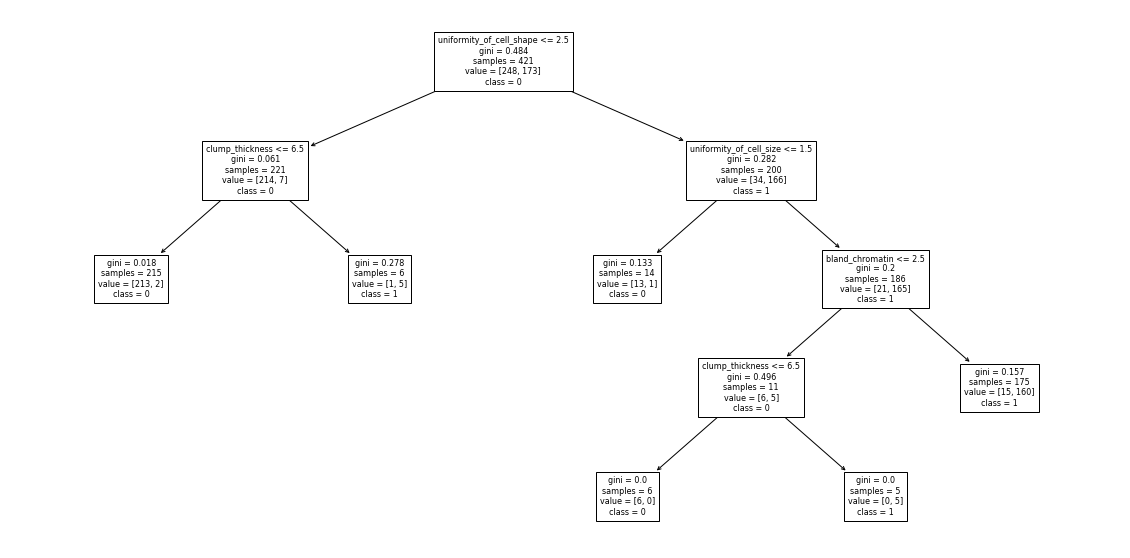

accuracy :  [0.9148936170212766, 0.9148936170212766, 0.9148936170212766, 0.9148936170212766, 0.9148936170212766, 0.9148936170212766, 0.9148936170212766, 0.9148936170212766, 0.9148936170212766, 0.6595744680851063]
precision :  [0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.0]
recall :  [0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.0]
f1_score :  [0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.0]
auc score :  [0.9203629032258065, 0.9203629032258065, 0.9203629032258065, 0.9203629032258065, 0.9203629032258065, 0.9203629032258065, 0.9203629032258065, 0.9203629032258065, 0.9203629032258065, 0.5]


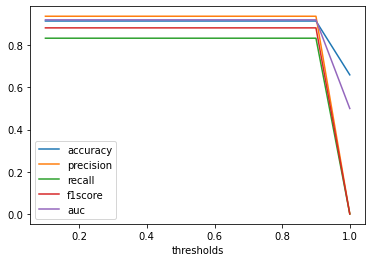

In [263]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1score, auc
cancer_dt_clf = DecisionTreeClassifier(ccp_alpha=0.01)
cancer_dt_clf.fit(X_cancer_train, y_cancer_train)
pred = cancer_dt_clf.predict(X_cancer_test)
get_clf_eval(y_cancer_test, pred)
plt.figure(figsize=(20,10))
plot_tree(cancer_dt_clf, class_names=['0', '1'],
          feature_names=X_cancer_train.columns, fontsize=8)
plt.show()

from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_auc = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_cancer_test, custom_predict)
        ts_accuracy.append(result[0])
        ts_precision.append(result[1])
        ts_recall.append(result[2])
        ts_f1score.append(result[3])
        ts_auc.append(result[4])
        
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    ts_datas['auc'] = ts_auc
    print('accuracy : ',ts_accuracy)
    print('precision : ', ts_precision)
    print('recall : ', ts_recall)
    print('f1_score : ',ts_f1score)
    print('auc score : ',ts_auc)
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
    
cancer_dt_clf = DecisionTreeClassifier(max_depth=10)
cancer_dt_clf.fit(X_cancer_train, y_cancer_train)
pred_proba = cancer_dt_clf.predict_proba(X_cancer_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_cancer_test, pred_proba, thresholds)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, BaggingClassifier

dt1 = DecisionTreeClassifier(max_depth=4, max_features=)
dt2 = DecisionTreeClassifier(max_depth=8)
et1 = ExtraTreesClassifier(max_depth=4)
et2 = ExtraTreesClassifier()
et3 = ExtraTreesClassifier()
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()
rf3 = RandomForestClassifier()
hgb1 = HistGradientBoostingClassifier()
hgb2 = HistGradientBoostingClassifier()
hgb3 = HistGradientBoostingClassifier()
bg1 = BaggingClassifier()
bg2 = BaggingClassifier()
bg3 = BaggingClassifier()
xgb1 = XGBClassifier()
xgb2 = XGBClassifier()
xgb3 = XGBClassifier()